# EDA of time-series data for bike share

In [49]:
import pandas as pd
data=pd.read_csv("dc_bike_share_train.csv", parse_dates=["datetime"])
data.tail()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


It is a timeseries data with hourly information from 1st Jan, 2011 to 19th Dec, 2012

In [2]:
# Check dataframe dimension
data.shape

(10886, 12)

There are 10885 datapoints (+1 for header) and 12 columns/features

In [4]:
#Check null values and datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


There are no null values, data is clean. The 12 columns are int/float type with one datetime type

In [27]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
data["season"].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

There are 4 seasons during the time period of the data

In [6]:
data["holiday"].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

Assuming 0 means no holiday and 1 means holiday, during the time period, there are less holidays

In [7]:
data["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

Assuming 0 means off and 1 means workday, during the time period, there are more working days as compared to offs

In [8]:
data["weather"].value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

Not sure what weather column stands for, but it has for unique values

## Feature engineering:

Extract months, days, hours from the datetime series using pandas. This will add more sense to analyze the data

In [51]:
# Extract months, days, hours as new features
data["month"]=data["datetime"].dt.month
data["day"]=data["datetime"].dt.day
data["hour"]=data["datetime"].dt.hour
data["weekday"]=data["datetime"].dt.day_name()
data=data.set_index("datetime")
data

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour,weekday
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0,Saturday
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1,Saturday
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2,Saturday
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3,Saturday
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19,Wednesday
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20,Wednesday
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21,Wednesday


The highest day seem to be 19. Let's check and confirm.

In [71]:
data["day"].max()

19

## I. Seasonality 

Seasonality refers to periodic fluctuations in time series data that happens at regular periods. While traditionally used to literally mean seasons (e.g. Spring, Summer, Autumn, Winter), it can occur during any time period, like hours, days, or weeks.
    
   
    

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

### Seasonality in weather conditions and count of bike rides

First group the data by time, and display distribution for each time point to visualize seasonality using box-plot


In [95]:
#Function to create boxplot:

def boxPlot(col_names, n, x, d):
    """
    Function to create boxplot
    Arguments: names of columns, number of subplots, column for x-axis, dataframe
    Outputs subplots of boxplot for every column 
    """
    fig, axes = plt.subplots(n, 1, figsize=(11, 18), sharex=True)
    for name, ax in zip(col_names, axes):
        sns.boxplot(data=d, x=x, y=name, ax=ax)
        ax.set_ylabel('Values')
        ax.set_title(name)
        # Remove the automatic x-axis label from all but the bottom subplot
        if ax != axes[-1]:
            ax.set_xlabel('')
            

### 1. Monthly

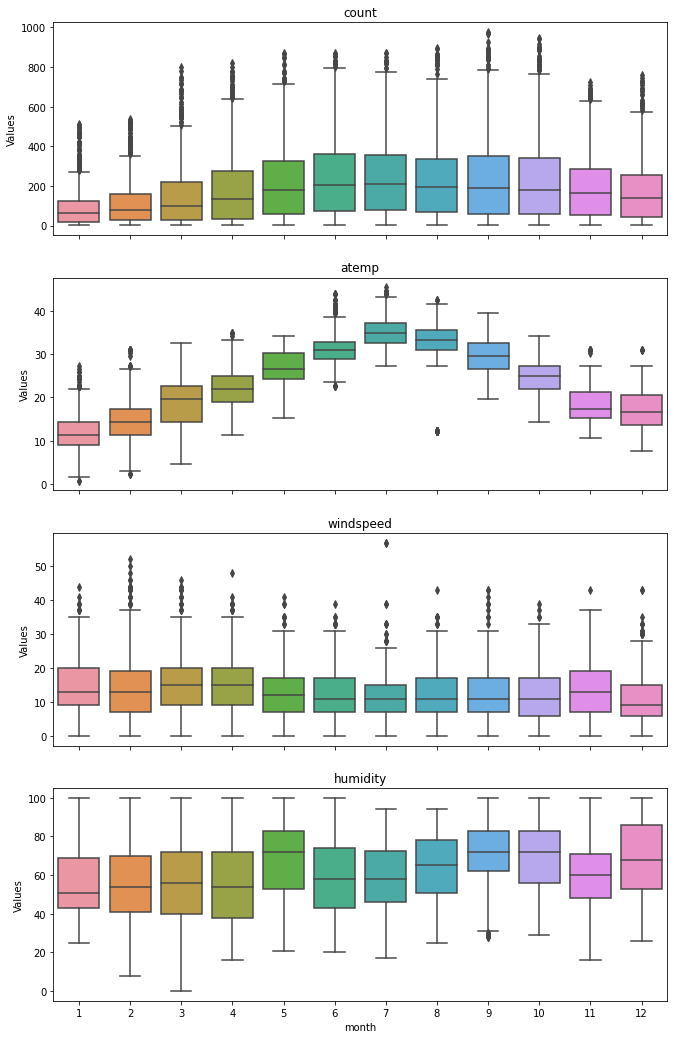

In [88]:
#For monthly trend, it makes sense to use avg. temp i.e. "atemp"
col_names=["count", "atemp", "windspeed", "humidity"]
n = len(col_names)
d=data
x='month'
boxPlot(col_names, n, x, d)

Count of rides gradually increases during summer months, i.e. from May to June and July and gradually decreases. However there is slight decrease up until October.
This trend is evident in the temperature/average temperature. While July is the hottest month, the count of bikes is almost equal during June and July.
January has the least rides,followed by February. Its upper quartile is lower than February and December. This can be attributed to extreme temperature and holiday season.
The median windspeed is almost constant during June to October, this could impact bike riding. May, September, October and December have the highest humidity.


## 2. Daily (weekdays)

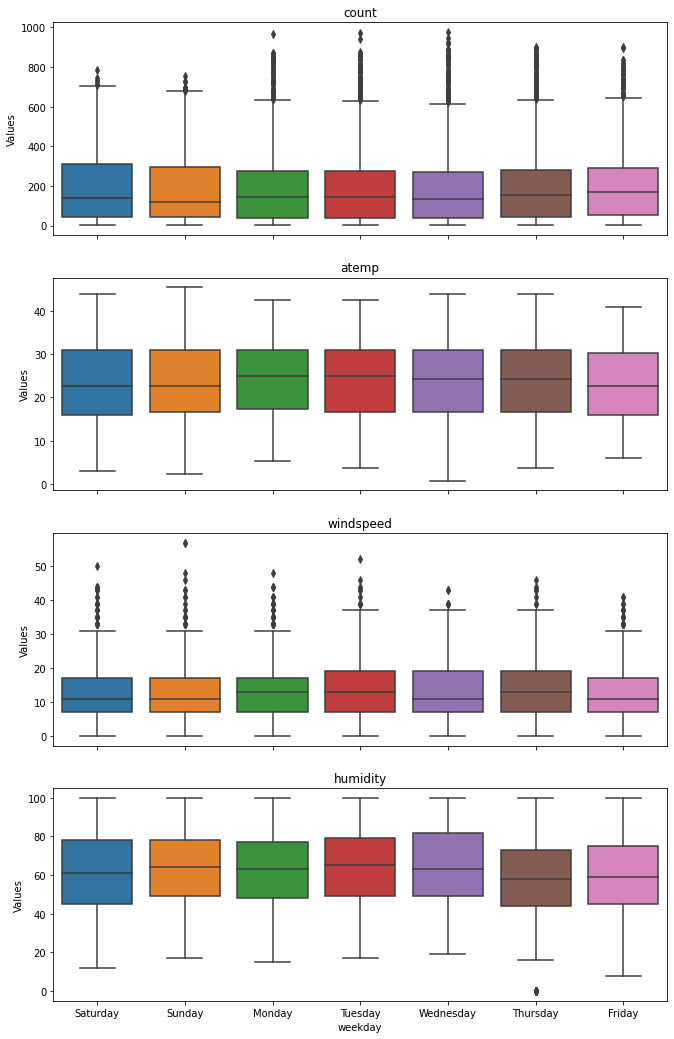

In [89]:
col_names=["count", "atemp", "windspeed", "humidity"]
n = len(col_names)
d=data
x='weekday'
boxPlot(col_names, n, x, d)

The dispersion of data is almost equal or slightly higher on weekends as compared to that of weekdays. However, on weekdays the median is high and there are more high outliers, suggesting more bike share.

## 3. Hourly

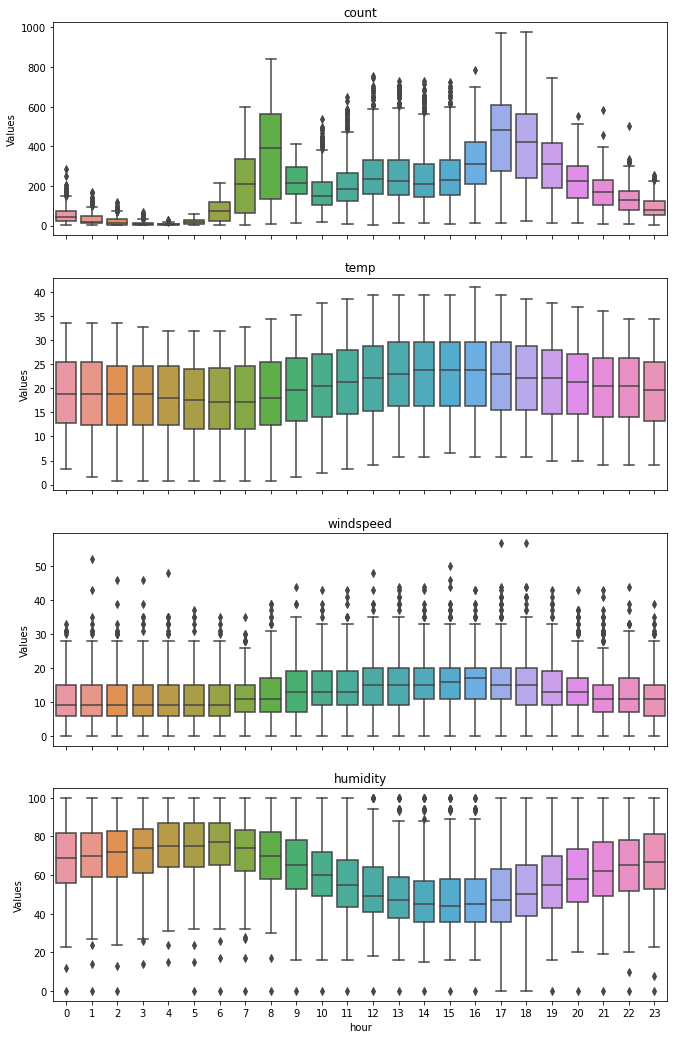

In [90]:
col_names=["count", "temp", "windspeed", "humidity"]
n = len(col_names)
d=data
x='hour'
#Function call
boxPlot(col_names, n, x, d)

Bike share is high between 7am-8am and then gradually decreases and remains constant from 12-3pm and peaks again around 5pm-6pm. This coincides with regular office hours.The high outliers are presumably during working days.
While temperature and average temperature gradually increases from 8am and then gradually decreases from 4pm, the change is marginal. Should this be correlated with spikes in bike share is not very clear. Similarly with hourly windspeed and humidity.

## Workday vs holiday trend analysis

In [73]:
#Creating subset of data from unique values in holiday column
holiday_0=data.loc[data["holiday"]==0]
holiday_1=data.loc[data["holiday"]==1]

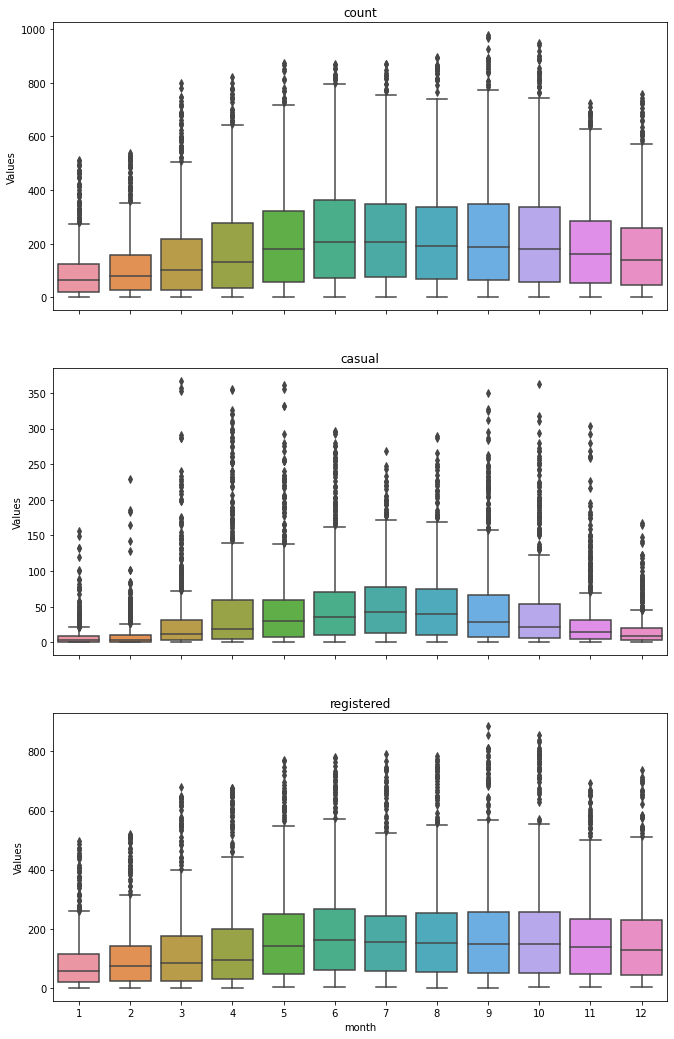

In [91]:
#Check count for no holiday
col_names=["count", "casual", "registered"]
n = len(col_names)
d=holiday_0
x='month'
boxPlot(col_names, n, x, d)

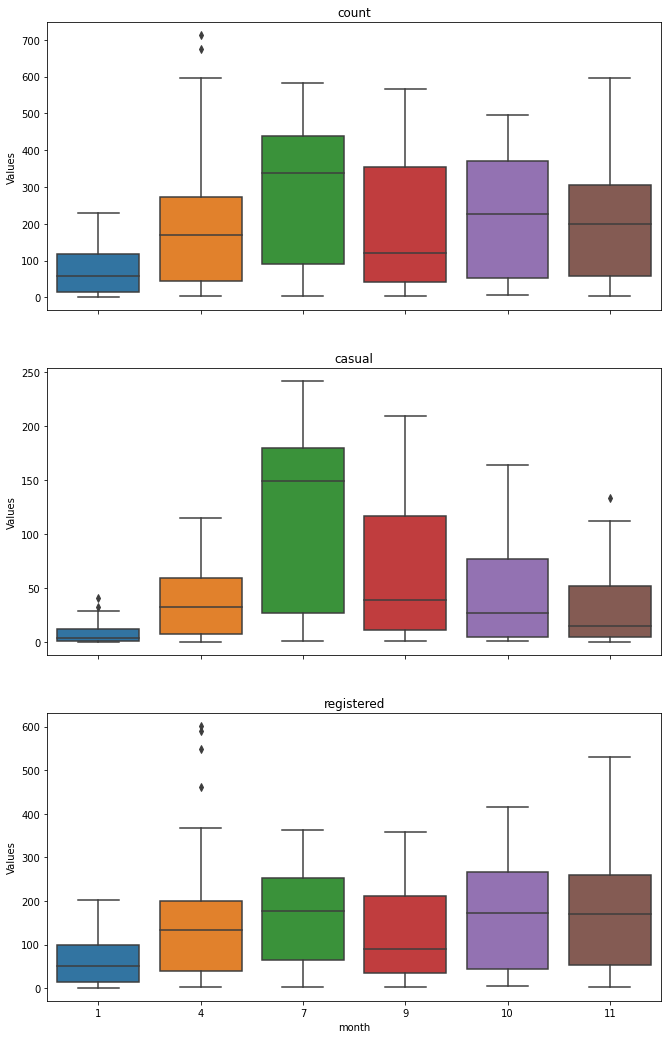

In [92]:
#Check count for holiday
col_names=["count", "casual", "registered"]
n = len(col_names)
d=holiday_1
x='month'
boxPlot(col_names, n, x, d)

In [77]:
##Creatig subset of data from unique values in workingday
workday_0=data.loc[data["workingday"]==0]
workday_1=data.loc[data["workingday"]==1]

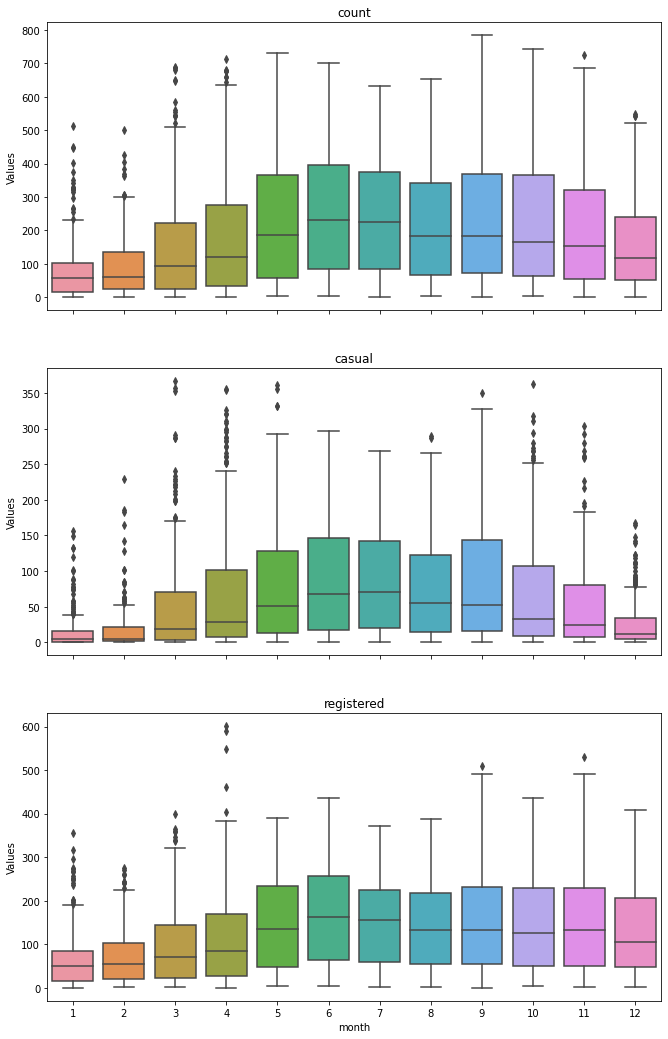

In [93]:
#Check count for no working day 
col_names=["count", "casual", "registered"]
n = len(col_names)
d=workday_0
x='month'
boxPlot(col_names, n, x, d)

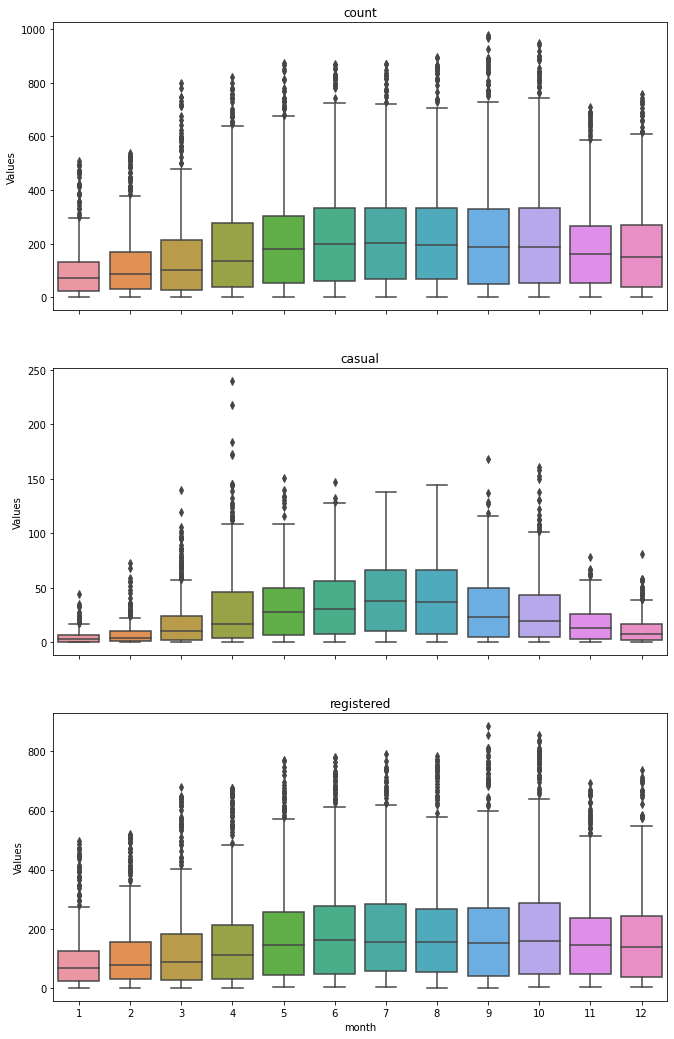

In [94]:
#Check count for working day 
col_names=["count", "casual", "registered"]
n = len(col_names)
d=workday_1
x='month'
boxPlot(col_names, n, x, d)

## II. Stationarity
A Time series (TS) is said to be stationary if its statistical properties such as mean, variance remain constant over time and an autocovariance that does not depend on time. Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can say that if a TS has a particular behaviour over time, there is a very high probability that it will follow the same in the future.

Using the Augmented Dickey Fuller test (adfuller()), from the statsmodels package to check for stationarity. The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then you reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if P Value > 0.05 we go ahead with finding the order of differencing.

In [100]:
#Check for stationarity in relevant features
from statsmodels.tsa.stattools import adfuller
from numpy import log
col=data[["count", "atemp", "registered", "casual"]]
for i in col:
    print(i)
    result = adfuller(data[i].dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

count
ADF Statistic: -6.419976
p-value: 0.000000
atemp
ADF Statistic: -4.366516
p-value: 0.000340
registered
ADF Statistic: -7.475670
p-value: 0.000000
casual
ADF Statistic: -10.383743
p-value: 0.000000


Since p-value is less than the significance level (0.05), we reject the null hypothesis. Hence, data is stationary. So, no differencing is required.

## III. Correlation heatmap

Identify highly correlated features by computing pearson's correlation coefficient

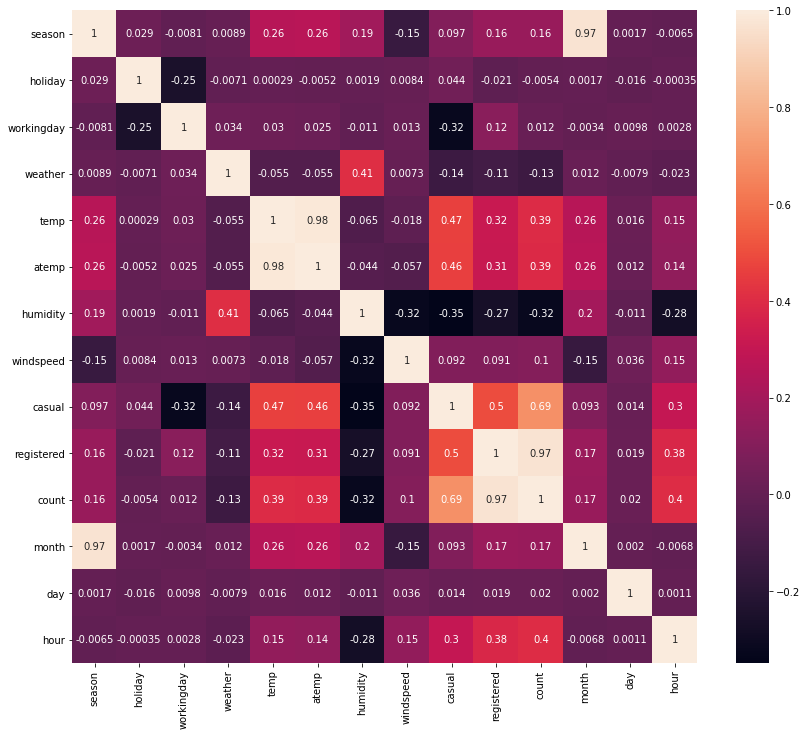

In [101]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,12))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True)
# plt.savefig("correlation_matrix")

If we are going to forecast count, then it is important to note that both registered and casual are highly correlated. And to avoid overfitting, one feature can be dropped. Since register has high correlation with count, so it is more likely to be a better predictor. Hence it can be retained. Also, it would make no sense to keep both temperature and average temperature for analysis as they have a very high correlation.